In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit, Aer, transpile, IBMQ, providers
from qiskit.circuit import Parameter, ParameterVector




[0.10025884 0.09933886 0.09842732 0.09752414 0.09662925 0.09574258
 0.09486404 0.09399356 0.09313106 0.09227649 0.09142975 0.09059078
 0.08975951 0.08893587 0.08811979 0.0873112  0.08651002 0.0857162
 0.08492966 0.08415034 0.08337817 0.08261309 0.08185502 0.08110391
 0.0803597  0.07962231 0.07889169 0.07816778 0.0774505  0.07673981
 0.07603564 0.07533793 0.07464662 0.07396166 0.07328298 0.07261053
 0.07194425 0.07128409 0.07062998 0.06998187 0.06933971 0.06870345
 0.06807302 0.06744838 0.06682946 0.06621623 0.06560863 0.0650066
 0.06441009 0.06381906 0.06323345 0.06265322 0.0620783  0.06150867
 0.06094426 0.06038503 0.05983093 0.05928192 0.05873794 0.05819896
 0.05766492 0.05713579 0.0566115  0.05609203 0.05557733 0.05506734
 0.05456204 0.05406138 0.05356531 0.05307379 0.05258678 0.05210424
 0.05162612 0.0511524  0.05068302 0.05021795 0.04975715 0.04930057
 0.04884818 0.04839995 0.04795583 0.04751578 0.04707977 0.04664777
 0.04621972 0.04579561 0.04537538 0.04495901 0.04454647 0.044137

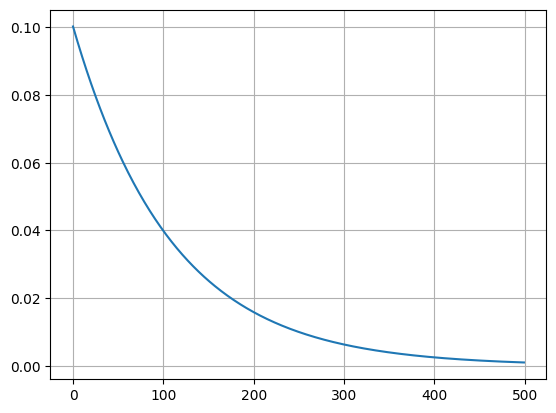

In [2]:
learningRateStart = 0.1 #########both perturbationSize og learningRate kan sættes til None hvis skal kalibrere selv - actually not
learningRateStop = 0.01

changingLearningRate = np.logspace(-2.3, -6.9, num=500, base=np.e)


plt.plot(range(500), changingLearningRate)
plt.grid()
print(changingLearningRate)


In [3]:
changingLearningRate[250]

0.010005611249229399

[0.1        0.0998016  0.09960321 0.09940481 0.09920641 0.09900802
 0.09880962 0.09861122 0.09841283 0.09821443 0.09801603 0.09781764
 0.09761924 0.09742084 0.09722244 0.09702405 0.09682565 0.09662725
 0.09642886 0.09623046 0.09603206 0.09583367 0.09563527 0.09543687
 0.09523848 0.09504008 0.09484168 0.09464329 0.09444489 0.09424649
 0.0940481  0.0938497  0.0936513  0.09345291 0.09325451 0.09305611
 0.09285772 0.09265932 0.09246092 0.09226253 0.09206413 0.09186573
 0.09166733 0.09146894 0.09127054 0.09107214 0.09087375 0.09067535
 0.09047695 0.09027856 0.09008016 0.08988176 0.08968337 0.08948497
 0.08928657 0.08908818 0.08888978 0.08869138 0.08849299 0.08829459
 0.08809619 0.0878978  0.0876994  0.087501   0.08730261 0.08710421
 0.08690581 0.08670741 0.08650902 0.08631062 0.08611222 0.08591383
 0.08571543 0.08551703 0.08531864 0.08512024 0.08492184 0.08472345
 0.08452505 0.08432665 0.08412826 0.08392986 0.08373146 0.08353307
 0.08333467 0.08313627 0.08293788 0.08273948 0.08254108 0.0823

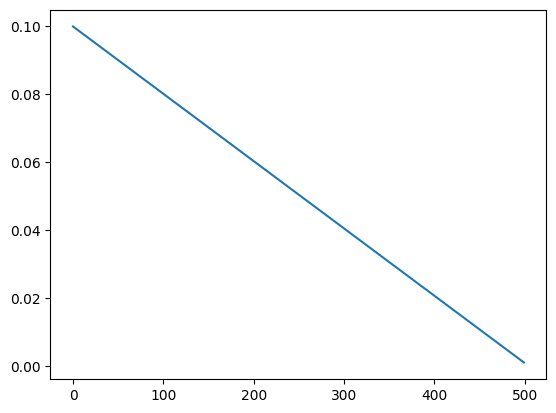

In [4]:
changingLearningRate = np.linspace(0.1, 0.001, num=500)
plt.plot(range(500), changingLearningRate)
print(changingLearningRate)

In [5]:
provider = IBMQ.load_account()
backend = provider.get_backend('ibmq_quito')


ibmqfactory.load_account:WARNING:2022-12-08 13:30:28,906: Credentials are already in use. The existing account in the session will be replaced.


\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{2}})} & \qswap & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \ctrl{-1} & \qswap \qwx[-1] & \qw & \qw\\
\\ }}
\end{document}


In [17]:
qc = QuantumCircuit(2)
qc.crz(np.pi/2,1,0)
qc.swap(0,1)
print(qc.draw('latex_source'))


\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{2}})} & \qswap & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \ctrl{-1} & \qswap \qwx[-1] & \qw & \qw\\
\\ }}
\end{document}


In [19]:
print('Depth:', qc.depth())
print('Gate counts:', qc.count_ops())
print()
transQC = []
for kk in range(4):
    transQC.append(transpile(qc, backend, optimization_level=kk))
    print('Optimization Level {}'.format(kk))
    print('Depth:', transQC[kk].depth())
    print('Gate counts:', transQC[kk].count_ops())
    print()


Depth: 2
Gate counts: OrderedDict([('crz', 1), ('swap', 1)])

Optimization Level 0
Depth: 7
Gate counts: OrderedDict([('cx', 5), ('rz', 2)])

Optimization Level 1
Depth: 7
Gate counts: OrderedDict([('cx', 5), ('rz', 2)])

Optimization Level 2
Depth: 7
Gate counts: OrderedDict([('cx', 5), ('rz', 2)])

Optimization Level 3
Depth: 4
Gate counts: OrderedDict([('rz', 2), ('cx', 2)])



In [20]:
print(transQC[0].draw('latex_source'))



\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0}\;\mapsto\;{0} :  } & \lstick{{q}_{0}\;\mapsto\;{0} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{4}})} & \targ & \gate{\mathrm{R_Z}\,(\mathrm{-\frac{\pi}{4}})} & \targ & \ctrl{1} & \targ & \ctrl{1} & \qw & \qw\\
	 	\nghost{{q}_{1}\;\mapsto\;{1} :  } & \lstick{{q}_{1}\;\mapsto\;{1} :  } & \qw & \ctrl{-1} & \qw & \ctrl{-1} & \targ & \ctrl{-1} & \targ & \qw & \qw\\
	 	\nghost{{ancilla}_{0}\;\mapsto\;{2} :  } & \lstick{{ancilla}_{0}\;\mapsto\;{2} :  } & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{ancilla}_{1}\;\mapsto\;{3} :  } & \lstick{{ancilla}_{1}\;\mapsto\;{3} :  } & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{ancilla}_{2}\;\mapsto\;{4} :  } & \lstick{{ancilla}_{2}\;\mapsto\;{4} :  } & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw & \qw\\
\\ }}
\end{document

In [21]:
print(transQC[3].draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{ancilla}_{0}\;\mapsto\;{0} :  } & \lstick{{ancilla}_{0}\;\mapsto\;{0} :  } & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{1}\;\mapsto\;{1} :  } & \lstick{{q}_{1}\;\mapsto\;{1} :  } & \qw & \ctrl{2} & \qw & \ctrl{2} & \qw & \qw\\
	 	\nghost{{ancilla}_{1}\;\mapsto\;{2} :  } & \lstick{{ancilla}_{1}\;\mapsto\;{2} :  } & \qw & \qw & \qw & \qw & \qw & \qw\\
	 	\nghost{{q}_{0}\;\mapsto\;{3} :  } & \lstick{{q}_{0}\;\mapsto\;{3} :  } & \gate{\mathrm{R_Z}\,(\mathrm{\frac{\pi}{4}})} & \targ & \gate{\mathrm{R_Z}\,(\mathrm{-\frac{\pi}{4}})} & \targ & \qw & \qw\\
	 	\nghost{{ancilla}_{2}\;\mapsto\;{4} :  } & \lstick{{ancilla}_{2}\;\mapsto\;{4} :  } & \qw & \qw & \qw & \qw & \qw & \qw\\
\\ }}
\end{document}
